In [2]:
import scipy.io
data = scipy.io.loadmat('../../url.mat')

**create list for labels and data, where one entry is the data for the day with this index**

In [3]:
import numpy as np

num_of_days = 120
X, Y = [], []

for i in range(num_of_days):
    day_data = data["Day" + str(i)]
    X.append(day_data[0][0][0])
    Y.append(day_data[0][0][1])

**continous learn classifier**

In [4]:
# incremental learns classifier (must have partial_fit() function)
# returns an array of cumulative error rates for each day
def learn_incremental(clf, batch_size = 1000):
    
    #print("Batch size {}".format(batch_size))
    error_rates = []
    num_of_days = 120
    err = 0
    
    for curr_day in range(num_of_days): # looping through days
    
        if (curr_day != 45):
            X_curr_day = X[curr_day]
    
            # split the data in slices of batch_size
            batches_amount = int(X_curr_day.shape[0] / batch_size)
            Y_curr_day = np.array_split(Y[curr_day], batches_amount)
    
            for j in range(batches_amount): # looping through individual urls
                select_ind = np.arange(j * batch_size, (j+1) * batch_size)
        
                X_curr_url_batch, Y_curr_url_batch = X_curr_day[select_ind,:], Y_curr_day[j] 
        
                # flatten y to 1d
                Y_curr_url_batch = Y_curr_url_batch.ravel()
        
                if (j > 0):
                    Y_preds = clf.predict(X_curr_url_batch)
            
                    for k in range(batch_size):
                        if(Y_preds[k] != Y_curr_url_batch[k]):
                            err = err + 1
        
                clf.partial_fit(X_curr_url_batch, Y_curr_url_batch, classes=list(range(2))) # Continous fitting of urls and label
            
            print("Log: Day {}: {}".format(curr_day ,err / X_curr_day.shape[0]))
            error_rates.append(err / X_curr_day.shape[0])
            err = 0
    return error_rates

**evaluate accuracy**

In [5]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf = PassiveAggressiveClassifier(C=0.001, random_state = 123)

batch_size = 4000
error_rates = learn_incremental(clf, batch_size)

cnt = 0
for x in error_rates:    
    print("Error-rate Day {}   : {}".format(cnt, x))
    cnt = cnt + 1

Log: Day 0: 0.0295625
Log: Day 1: 0.0264
Log: Day 2: 0.022
Log: Day 3: 0.0206
Log: Day 4: 0.0222
Log: Day 5: 0.0217
Log: Day 6: 0.01735
Log: Day 7: 0.0228
Log: Day 8: 0.01905
Log: Day 9: 0.0223
Log: Day 10: 0.02165
Log: Day 11: 0.0193
Log: Day 12: 0.02005
Log: Day 13: 0.01565
Log: Day 14: 0.0182
Log: Day 15: 0.01575
Log: Day 16: 0.0162
Log: Day 17: 0.0164
Log: Day 18: 0.0166
Log: Day 19: 0.0155
Log: Day 20: 0.01755
Log: Day 21: 0.0242
Log: Day 22: 0.0164
Log: Day 23: 0.0205
Log: Day 24: 0.0234
Log: Day 25: 0.02325
Log: Day 26: 0.01595
Log: Day 27: 0.0203
Log: Day 28: 0.018
Log: Day 29: 0.0221
Log: Day 30: 0.0278
Log: Day 31: 0.0225
Log: Day 32: 0.02135
Log: Day 33: 0.02265
Log: Day 34: 0.00035
Log: Day 35: 0.03155
Log: Day 36: 0.0025
Log: Day 37: 0.00075
Log: Day 38: 0.0341
Log: Day 39: 0.0344
Log: Day 40: 0.02295
Log: Day 41: 0.019
Log: Day 42: 0.0225
Log: Day 43: 0.0207
Log: Day 44: 0.01415
Log: Day 46: 0.0169
Log: Day 47: 0.0174
Log: Day 48: 0.02615
Log: Day 49: 0.0227
Log: Day 50: 

In [10]:
import matplotlib.pyplot as plt

def plot5degree(error_rates, batch_size, scatter = False):
    
    # Set up the day_indexes with the missing 45th day in mind
    y_indexes = np.arange(0, 120)
    y_indexes = np.delete(y_indexes, 46)
    
    y = np.array(error_rates)
    y = y * 100
    x = y_indexes

    # create polynomial equation and calculate line
    theta = np.polyfit(x, y, 5)
    y_line = theta[5] + theta[4] * pow(x, 1) + theta[3] * pow(x, 2) + theta[2] * pow(x, 3) + theta[1] * pow(x, 4) + theta[0] * pow(x, 5)

    if (scatter):
        plt.scatter(x, y)
    
    plt.plot(x, y_line, 'r')
    plt.title('PA with batch size {}'.format(batch_size))
    plt.xlabel('Days')
    plt.ylabel('Cumulative error rate')
    plt.ylim([0,4])
    plt.show()

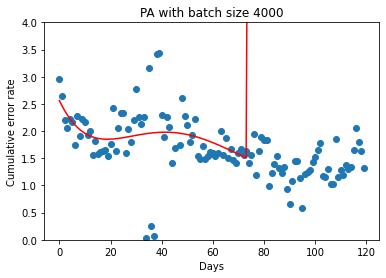

In [11]:
plot5degree(error_rates, batch_size, True)